In [12]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number, get_all_distances
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math
import seaborn as sb
import matplotlib.pyplot as plt

In [13]:
columns = columns = ["Date", "d<=0.5", "0.5<d<=1", "1<d<=1.5", "1.5<d<=2", "2<d<=2.5", "2.5<d<=3", "3<d"]
heatmapDf = pd.DataFrame(columns = columns)
#heatmapDf = heatmapDf.append({"Date": 1, "d<=0.5": 1, "0.5<d<=1": 1, "1<d<=1.5": 1, "1.5<d<=2": 1, "2<d<=2.5": 1, "2.5<d<=3": 1, "3<d": 1}, ignore_index = True)
heatmapDf

,Date,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d


In [14]:
#StandardDeviation ist nicht sinnvoll, da alle Abstände sowieso schon in kleinen Intervallen liegen
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Daten ZHDB"):
    if "0304" in filename or "0401" in filename or "0506" in filename:
        df = get_whole_df(filename, 5, 5)
        borderDistance = get_all_distances(df)
        print(str(len(borderDistance)) + " Abstände wurden gemessen")
        halfMeter = len([i for i in borderDistance if i <= 0.5])
        oneMeter = len([i for i in borderDistance if (i <= 1) and (i > 0.5)])
        oneAndHalfMeter = len([i for i in borderDistance if (i <= 1.5) and (i > 1)])
        twoMeter = len([i for i in borderDistance if (i <= 2) and (i > 1.5)])
        twoAndHalfMeter = len([i for i in borderDistance if (i <= 2.5) and (i > 2)])
        threeMeter = len([i for i in borderDistance if (i <= 3) and (i > 2.5)])
        biggerThree = len([i for i in borderDistance if i > 3])
        heatmapDf = heatmapDf.append({"Date": filename, "d<=0.5": halfMeter, "0.5<d<=1": oneMeter, "1<d<=1.5": oneAndHalfMeter, 
                                      "1.5<d<=2": twoMeter, "2<d<=2.5": twoAndHalfMeter, "2.5<d<=3": threeMeter, 
                                      "3<d": biggerThree}, ignore_index = True)

ZHDB_0304_6_20.txt
3884 Abstände wurden gemessen
ZHDB_0401_6_20.txt
496 Abstände wurden gemessen
ZHDB_0506_6_20.txt
1235 Abstände wurden gemessen


In [15]:
heatmapDf

,Date,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d
0,ZHDB_0304_6_20.txt,89,1123,811,691,492,363,315
1,ZHDB_0401_6_20.txt,2,70,143,87,80,44,70
2,ZHDB_0506_6_20.txt,53,258,285,214,162,128,135


In [16]:
date = heatmapDf["Date"]
heatmapDfRelatvie = pd.DataFrame(columns = columns)

In [17]:
for index, row in heatmapDf.iterrows():
    anzahlAbstande = sum(row[1:])
    date = row[0]
    relativeAbstande = row[1:]/anzahlAbstande
    heatmapDfRelatvie = heatmapDfRelatvie.append({"Date": date, "d<=0.5": relativeAbstande[0], "0.5<d<=1": relativeAbstande[1], 
                                                  "1<d<=1.5": relativeAbstande[2], "1.5<d<=2": relativeAbstande[3], 
                                                  "2<d<=2.5": relativeAbstande[4], "2.5<d<=3": relativeAbstande[5],
                                                  "3<d": relativeAbstande[6]}, ignore_index = True)
heatmapDfRelatvie

,Date,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d
0,ZHDB_0304_6_20.txt,0.022915,0.289135,0.208805,0.177909,0.126674,0.093460,0.081102
1,ZHDB_0401_6_20.txt,0.004032,0.141129,0.288306,0.175403,0.161290,0.088710,0.141129
2,ZHDB_0506_6_20.txt,0.042915,0.208907,0.230769,0.173279,0.131174,0.103644,0.109312


In [18]:
heatmapDfRelatvie.index = heatmapDfRelatvie["Date"]
heatmapDfRelatvie = heatmapDfRelatvie.drop("Date", axis = 1)
heatmapDfRelatvie

,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d
Date,,,,,,,
ZHDB_0304_6_20.txt,0.022915,0.289135,0.208805,0.177909,0.126674,0.093460,0.081102
ZHDB_0401_6_20.txt,0.004032,0.141129,0.288306,0.175403,0.161290,0.088710,0.141129
ZHDB_0506_6_20.txt,0.042915,0.208907,0.230769,0.173279,0.131174,0.103644,0.109312


In [19]:
heatmapDfRelatvieSwap = heatmapDfRelatvie.transpose()
heatmapDfRelatvieSwap.columns = ["04.03.2020", "01.04.2020", "06.05.2020"]
heatmapDfRelatvieSwap

,04.03.2020,01.04.2020,06.05.2020
d<=0.5,0.022915,0.004032,0.042915
0.5<d<=1,0.289135,0.141129,0.208907
1<d<=1.5,0.208805,0.288306,0.230769
1.5<d<=2,0.177909,0.175403,0.173279
2<d<=2.5,0.126674,0.161290,0.131174
2.5<d<=3,0.093460,0.088710,0.103644
3<d,0.081102,0.141129,0.109312


In [20]:
for date in heatmapDfRelatvieSwap.columns:
    heatmapDfRelatvieSwap[date] = heatmapDfRelatvieSwap[date] * 100

In [21]:
import matplotlib as mlp
plt.rcParams["font.family"] = "Microsoft Yi Baiti"
mlp.rc('font',family="Microsoft Yi Baiti")

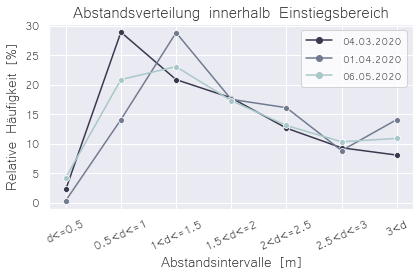

In [22]:
sb.set()
sb.lineplot(data = heatmapDfRelatvieSwap, markers = ["o", "o", "o", "o"], palette = "bone", sort = False, dashes = False)
plt.xticks(fontsize = 15, fontname = "Microsoft Yi Baiti", rotation = 25)
plt.xlabel("Abstandsintervalle [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.ylabel("Relative Häufigkeit [%]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.title("Abstandsverteilung innerhalb Einstiegsbereich", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.legend(facecolor = "white", prop={'family':"Microsoft Yi Baiti", 'size':13})
plt.tight_layout()
plt.savefig(r"Abstandsverteilung\Abstandsverteilung in Einstiegsbereich", dpi = 200)